<a href="https://colab.research.google.com/github/rizwanyusuf017/deep_learning/blob/main/batik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
mkdir /content/batik

In [2]:
cp /content/drive/MyDrive/Classroom/DATASET.zip /content/batik

In [4]:
!unzip /content/batik/DATASET.zip

Archive:  /content/batik/DATASET.zip
   creating: DATASET/
   creating: DATASET/TEST/
   creating: DATASET/TRAIN/
   creating: DATASET/TEST/Batik Sekar Jagad/
   creating: DATASET/TEST/Batik Cendrawasih/
   creating: DATASET/TEST/Batik Dayak/
   creating: DATASET/TEST/Batik Insang/
   creating: DATASET/TEST/Batik Ikat Celup/
   creating: DATASET/TEST/Batik Lasem/
   creating: DATASET/TEST/Batik Megamendung/
   creating: DATASET/TEST/Batik Betawi/
   creating: DATASET/TEST/Batik Pala/
   creating: DATASET/TEST/Batik Kawung/
   creating: DATASET/TEST/Batik Tambal/
   creating: DATASET/TEST/Batik Poleng/
   creating: DATASET/TEST/Batik Geblek Renteng/
   creating: DATASET/TEST/Batik Bali/
   creating: DATASET/TEST/Batik Parang/
   creating: DATASET/TRAIN/Batik Sekar Jagad/
   creating: DATASET/TRAIN/Batik Cendrawasih/
   creating: DATASET/TRAIN/Batik Dayak/
   creating: DATASET/TRAIN/Batik Insang/
   creating: DATASET/TRAIN/Batik Ikat Celup/
   creating: DATASET/TRAIN/Batik Lasem/
   crea

In [5]:
mv /content/DATASET /content/batik

In [100]:
import cv2
import os
import pandas as pd
import random as rn
import numpy as np
import fnmatch
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
import warnings
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tqdm import notebook 
from tqdm.notebook import tqdm as tqdm
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [101]:
print(os.listdir('/content/batik/DATASET/TRAIN'))
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
Z=[]
IMG_SIZE=150
batik_bali_DIR='/content/batik/DATASET/TRAIN/Batik Bali'
batik_betawi_DIR='/content/batik/DATASET/TRAIN/Batik Betawi'
batik_cendrawasih_DIR='/content/batik/DATASET/TRAIN/Batik Cendrawasih'
batik_lasem_DIR='/content/batik/DATASET/TRAIN/Batik Lasem'
batik_poleng_DIR='/content/batik/DATASET/TRAIN/Batik Poleng'

['Batik Megamendung', 'Batik Poleng', 'Batik Kawung', 'Batik Tambal', 'Batik Geblek Renteng', 'Batik Dayak', 'Batik Betawi', 'Batik Cendrawasih', 'Batik Pala', 'Batik Lasem', 'Batik Parang', 'Batik Bali', 'Batik Insang', 'Batik Sekar Jagad', 'Batik Ikat Celup']


In [102]:
def assign_label(img,batik_type):
    return batik_type

In [103]:
X=[]
def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):     
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))

In [104]:
make_train_data('Batik Bali',batik_bali_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

70


In [105]:
make_train_data('Batik Betawi',batik_betawi_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

140


In [106]:
make_train_data('Batik Cendrawasih',batik_cendrawasih_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

210


In [107]:
make_train_data('Batik Lasem',batik_lasem_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

280


In [108]:
make_train_data('Batik Poleng',batik_poleng_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

350


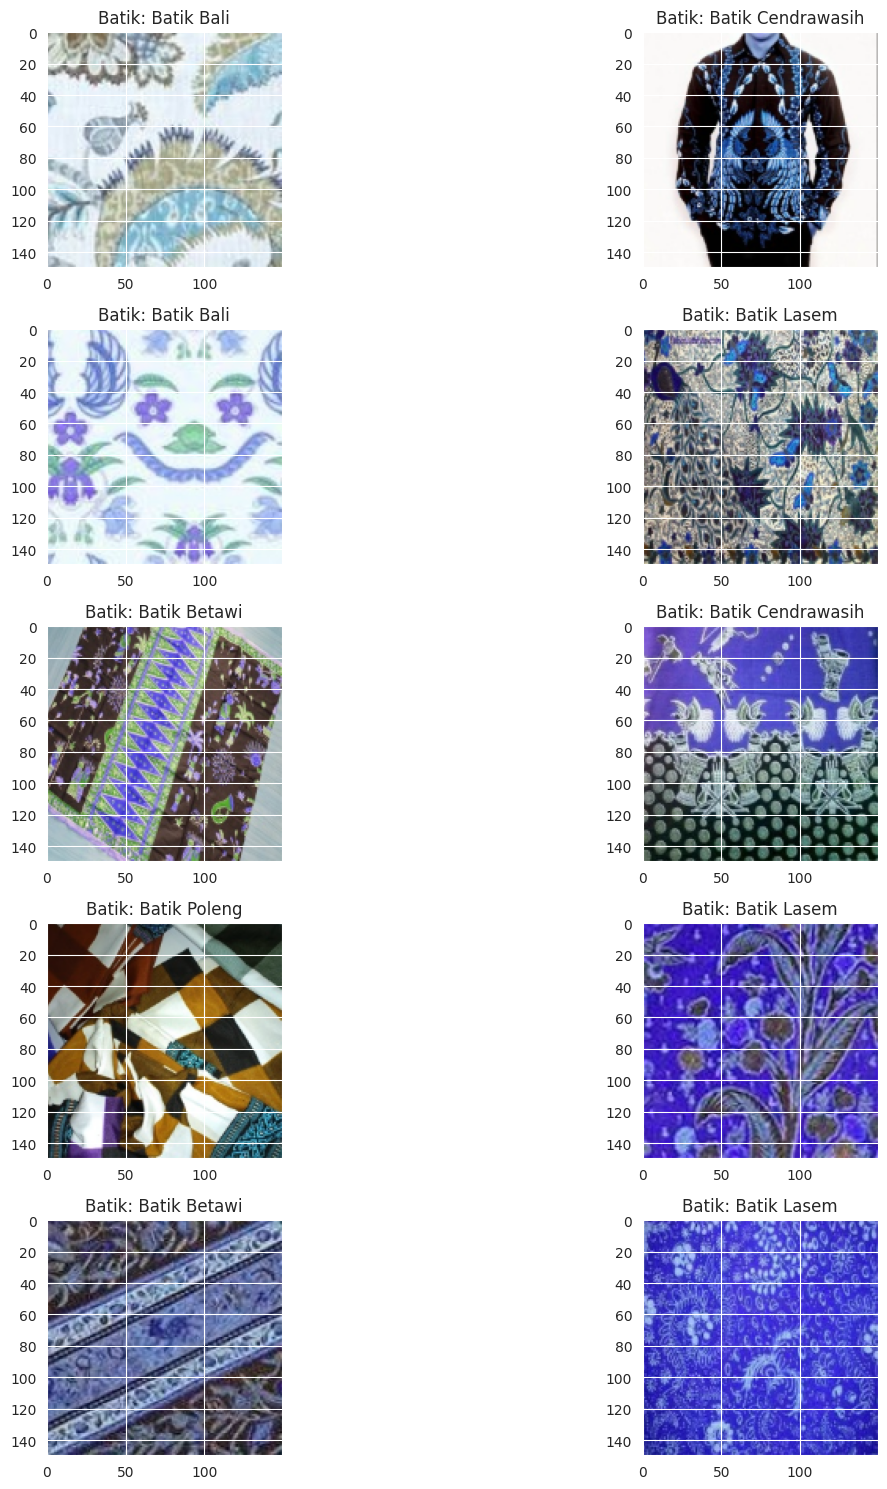

In [109]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()

In [110]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [111]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [112]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [113]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [114]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [115]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)
datagen.fit(x_train)

In [116]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 96)      

In [118]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
2/2 [==============================] - 9s 2s/step - loss: 1.6545 - accuracy: 0.2164 - val_loss: 1.6207 - val_accuracy: 0.1591
Epoch 2/50
2/2 [==============================] - 12s 6s/step - loss: 1.6047 - accuracy: 0.2148 - val_loss: 1.6059 - val_accuracy: 0.1932
Epoch 3/50
2/2 [==============================] - 13s 8s/step - loss: 1.5987 - accuracy: 0.1992 - val_loss: 1.5738 - val_accuracy: 0.3068
Epoch 4/50
2/2 [==============================] - 11s 6s/step - loss: 1.5678 - accuracy: 0.3203 - val_loss: 1.5087 - val_accuracy: 0.3977
Epoch 5/50
2/2 [==============================] - 7s 2s/step - loss: 1.5098 - accuracy: 0.4478 - val_loss: 1.5651 - val_accuracy: 0.2727
Epoch 6/50
2/2 [==============================] - 8s 2s/step - loss: 1.5914 - accuracy: 0.2313 - val_loss: 1.4490 - val_accuracy: 0.4205
Epoch 7/50
2/2 [==============================] - 6s 1s/step - loss: 1.4793 - accuracy: 0.3433 - val_loss: 1.4515 - val_accuracy: 0.3750
Epoch 8/50
2/2 [======================

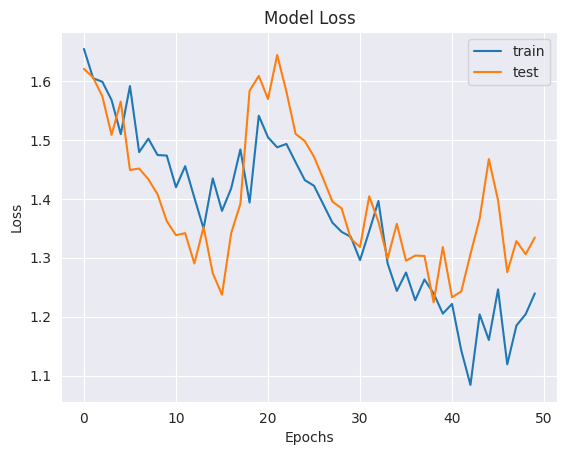

In [120]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

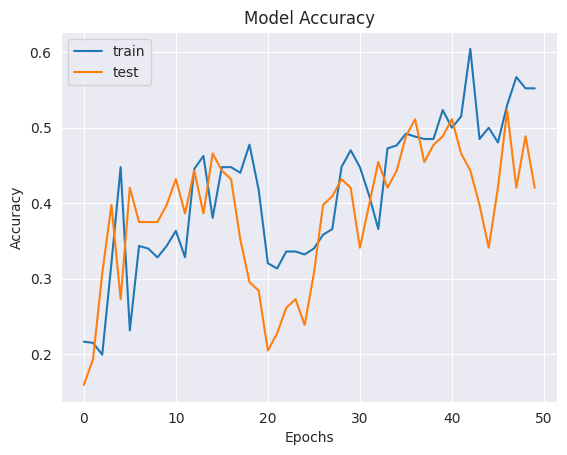

In [121]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [122]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

3/3 [==============================] - 1s 277ms/step


In [123]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

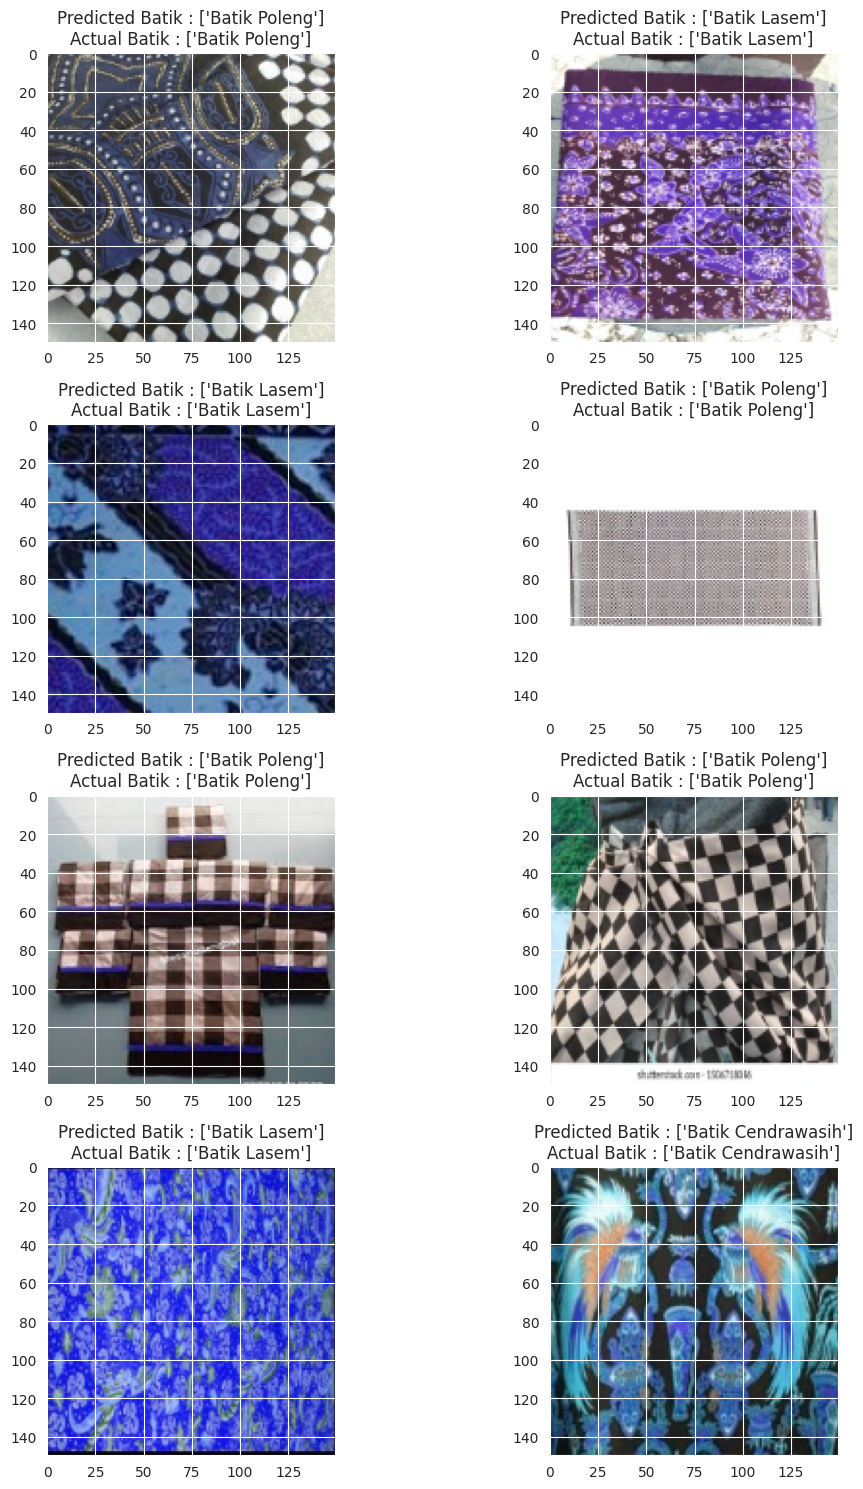

In [127]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

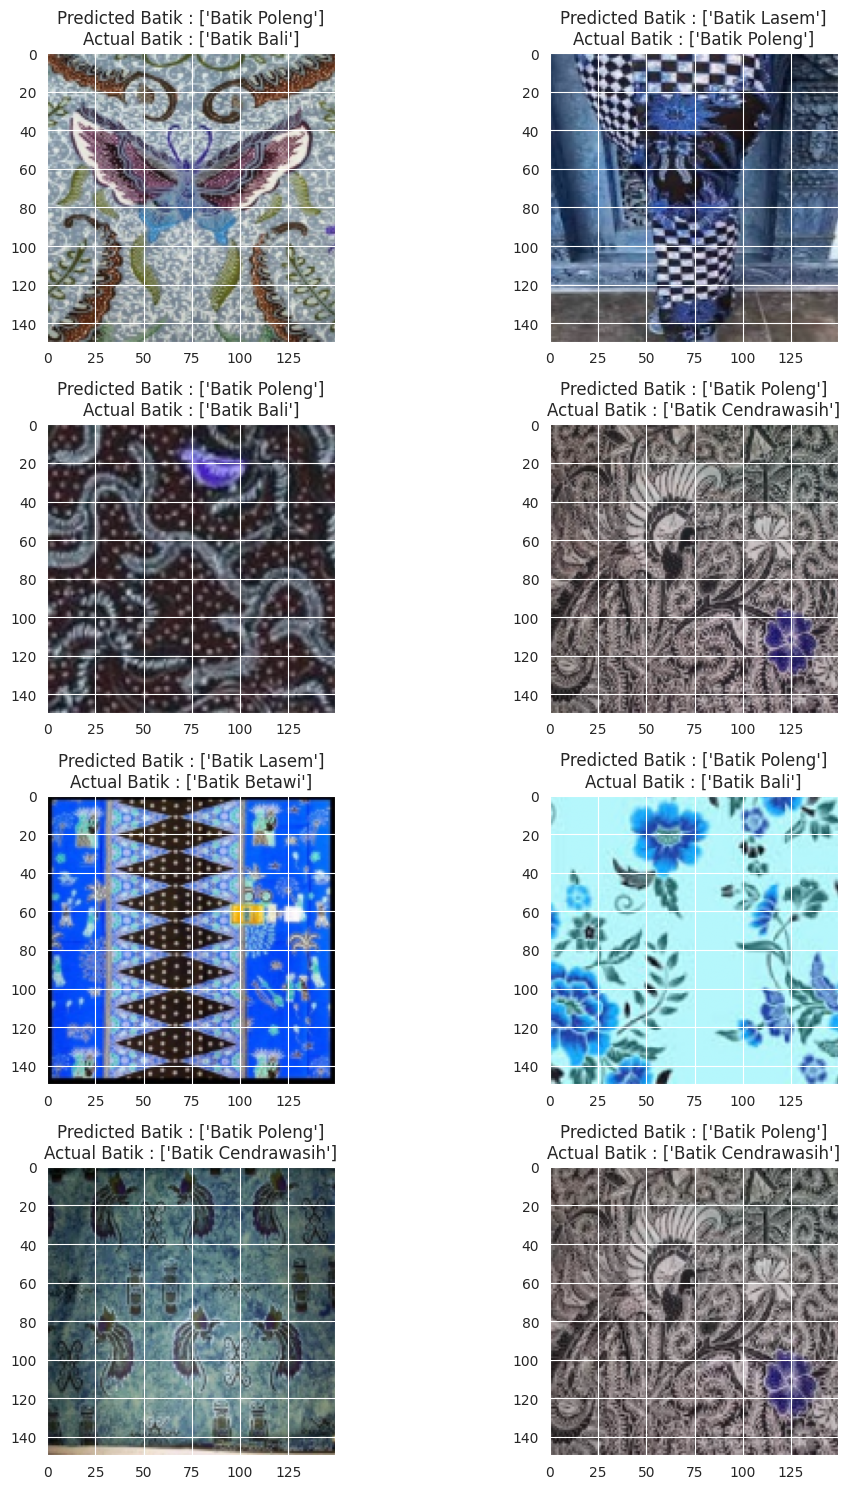

In [128]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[mis_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [129]:
tf.saved_model.save(model, '/content/batik')

In [130]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/batik')
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
#https://vittoriomazzia.com/tflite-tfrt-conversion-summary/
# save model
#tflite_model_file = pathlib.Path('/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/')
#tflite_model_file.write_bytes(tflite_model)

In [136]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#eb3434','#eb3446','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))
    
    
dhtml('Thnks to M.A, DEEP LEARNING, TEKNIK INFORMATIKA 2020' )